# C++的文件操作

# 1. 文件操作简介

① 程序运行时产生的数据都属于临时数据，程序一旦运行结束都会被释放。

② 通过文件可以将数据持久化。

③ C++中对文件操作需要包含头文件<fstream>

④ 文件类型分为两种：

1. 文本文件：文件以文本的ASCII码形式存储在计算机中。
2. 二进制文件：文件以文本的二进制形式存储在计算机中，用户一般不能直接读懂它们。

⑤ 操作文件的三大类

1. ofstream：写操作
2. ifstream：读操作
3. fstream：读写操作
    
⑥ 文件打开方式可以配合使用，利用|操作符。

1. 例如，用二进制方式写文件 ios:: binary | ios:: out

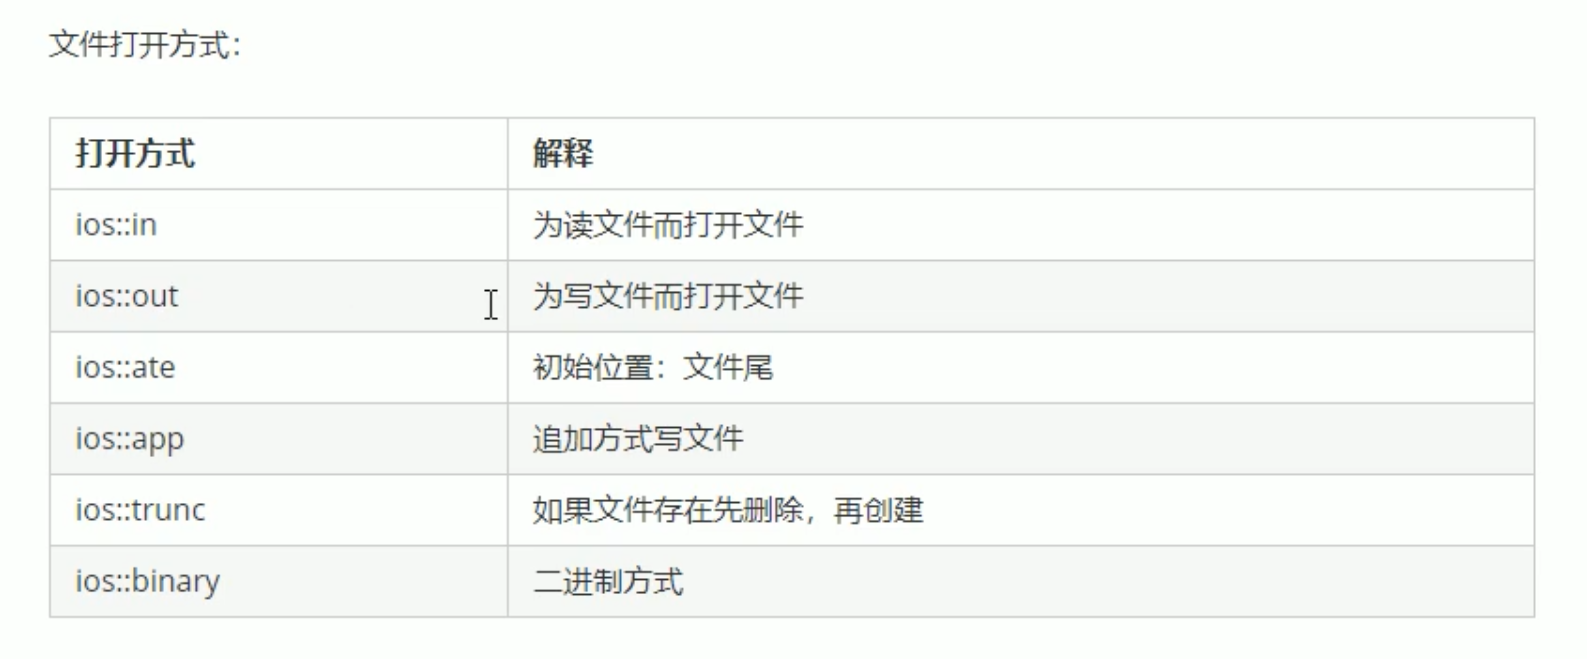

# 2. 文本文件--写文件

① 写文件步骤如下：

1. 包含头文件 #include $<fstream>$
2. 创建流对象 ofstream ofs;
3. 打开文件 ofs.open("文件路径",打开方式);
4. 关闭文件 ofs<<"写入数据";
5. 关闭文件 ofs.close();

In [ ]:
#include <iostream>
using namespace std;
#include<fstream> //头文件包含

//文本文件 写文件

void test01()
{
    //1、包含头文件 fstream

    //2、创建流文件

    ofstream ofs;    //创建流对象

    //3、指定打开方式
    ofs.open("test.txt", ios::out);  //当没有指定某盘路径时，创建的文件在该项目文件的路径下

    //4、写内容
    ofs << "姓名：张三" << endl;
    ofs << "性别：男" << endl;
    ofs << "年龄：18" << endl;

    //5、关闭文件
    ofs.close();
}

int main()
{
    test01();

    system("pause");

    return 0;
}

运行结果：  
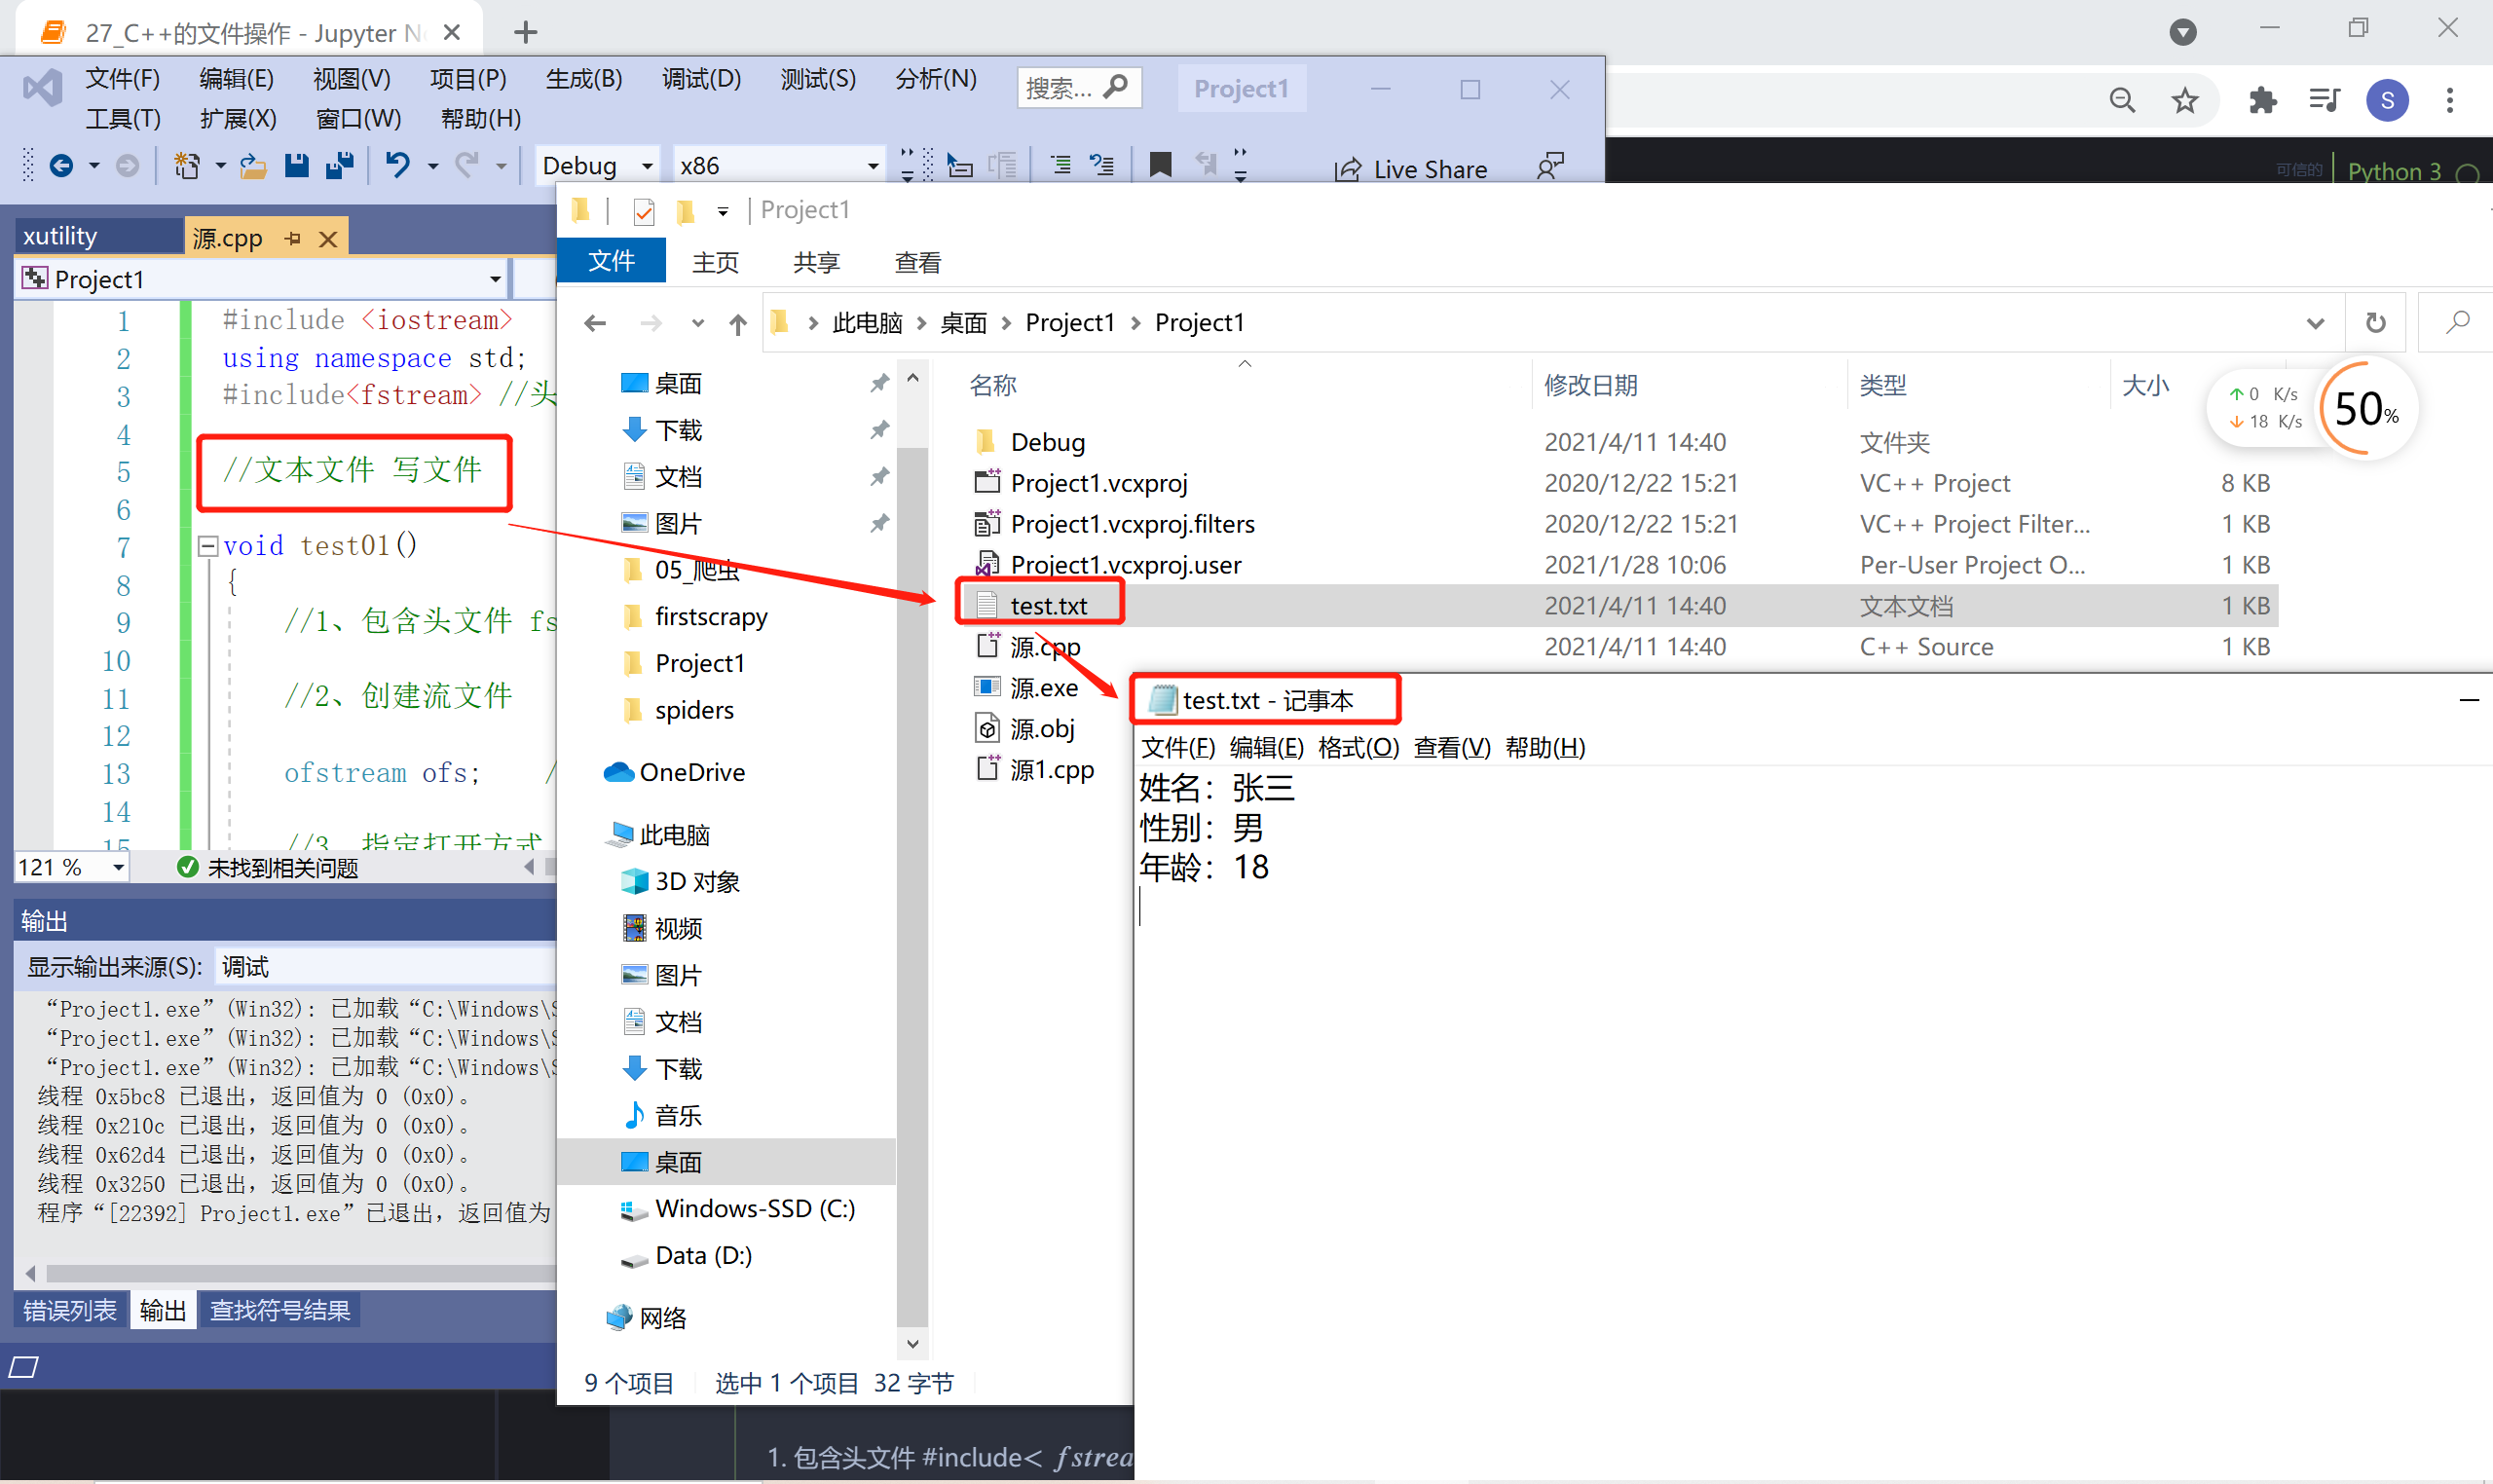

# 3. 文本文件--读操作

① 读文件与写文件步骤相似，但是读取方式相对比较多。

② 读文件步骤如下：

1. 包含头文件 #include$<fstream>$
2. 创建流对象 ifstream ifs;
3. 打开文件并判断文件是否成功打开 ifs.open("文件路径",打开方式);
4. 四种方式读取
5. 关闭文件 ifs.close();

In [ ]:
#include <iostream>
using namespace std;
#include<fstream>
#include<string>

//文本文件 读文件

void test01()
{
    //1、包含头文件 fstream

    //2、创建流文件

    ifstream ifs;    //创建流对象

    //3、打开文件，并且判断是否打开成功
    ifs.open("test.txt", ios::in);

    if (!ifs.is_open())
    {
        cout << "文件打开失败" << endl;
        return;
    }

    //4、读数据

    /*
    //第一种
    char buf[1024] = { 0 };  //字符数组初始化全为0
    while (ifs >> buf)     //一行一行数据读，存到buf里，当读不到数据的时候，返回False，退出循环
    {
        cout << buf << endl;
    }
    */
    
    /*
    //第二种
    char buf[1024] = { 0 };
    while (ifs.getline(buf, sizeof(buf)))  //第一个参数为数据放到哪里(地址)，第二个参数为最多要读多少个字节数
    {
        cout << buf << endl;
    }
    */

    /*
    //第三种
    string buf;
    while (getline(ifs,buf))
    {
        cout << buf << endl;
    }
    */
    
    //第四种
    char c;
    while ((c = ifs.get()) != EOF)  //每一次读取一个字符,字符放入c
    {                               //EOF表示读取到文件尾
        cout << c;
    }
    
    //5、关闭文件
    ifs.close();
}

int main()
{
    test01();

    system("pause");

    return 0;
}

运行结果：  
 - 姓名：张三  
 - 性别：男  
 - 年龄：18  
 - 请按任意键继续. . .

# 4. 二进制文件--写文件

① 以二进制的方式对文件进行读、写操作，打开方式要指定为 ios::binary

② 二进制方式写文件主要利用流对象调用成员函数write，函数原型：ostream write(const char * buffer,int len)

③ 参数解释：字符指针buffer指向内存中一段内存空间，len是读写的字节数。

In [ ]:
#include <iostream>
using namespace std;
#include<fstream>

//二进制文件 写文件

class Person
{
public:
    char m_Name[64];  //姓名  
    int m_Age;        //年龄
    //写字符串的时候最好不要用C++的string，有可能出现问题，最好用C的数组写字符串，因为它底层是用C写的
};

void test01()
{
    //1、包含头文件

    //2、创建流文件
    ofstream ofs;


    //3、打开文件
    ofs.open("person.txt", ios::out | ios::binary);  //二进制的方式写文件

    //ofstream  ofs.open("person.txt",ios::out | ios::binary)  也可以两步合成一步

    //4、写文件
    Person p = { "张三",18 };
    ofs.write((const char*)&p, sizeof(Person));  //对p取地址，然后强转为常量指针

    //5、关闭文件
    ofs.close();
}


int main()
{
    test01();

    system("pause");

    return 0;
}

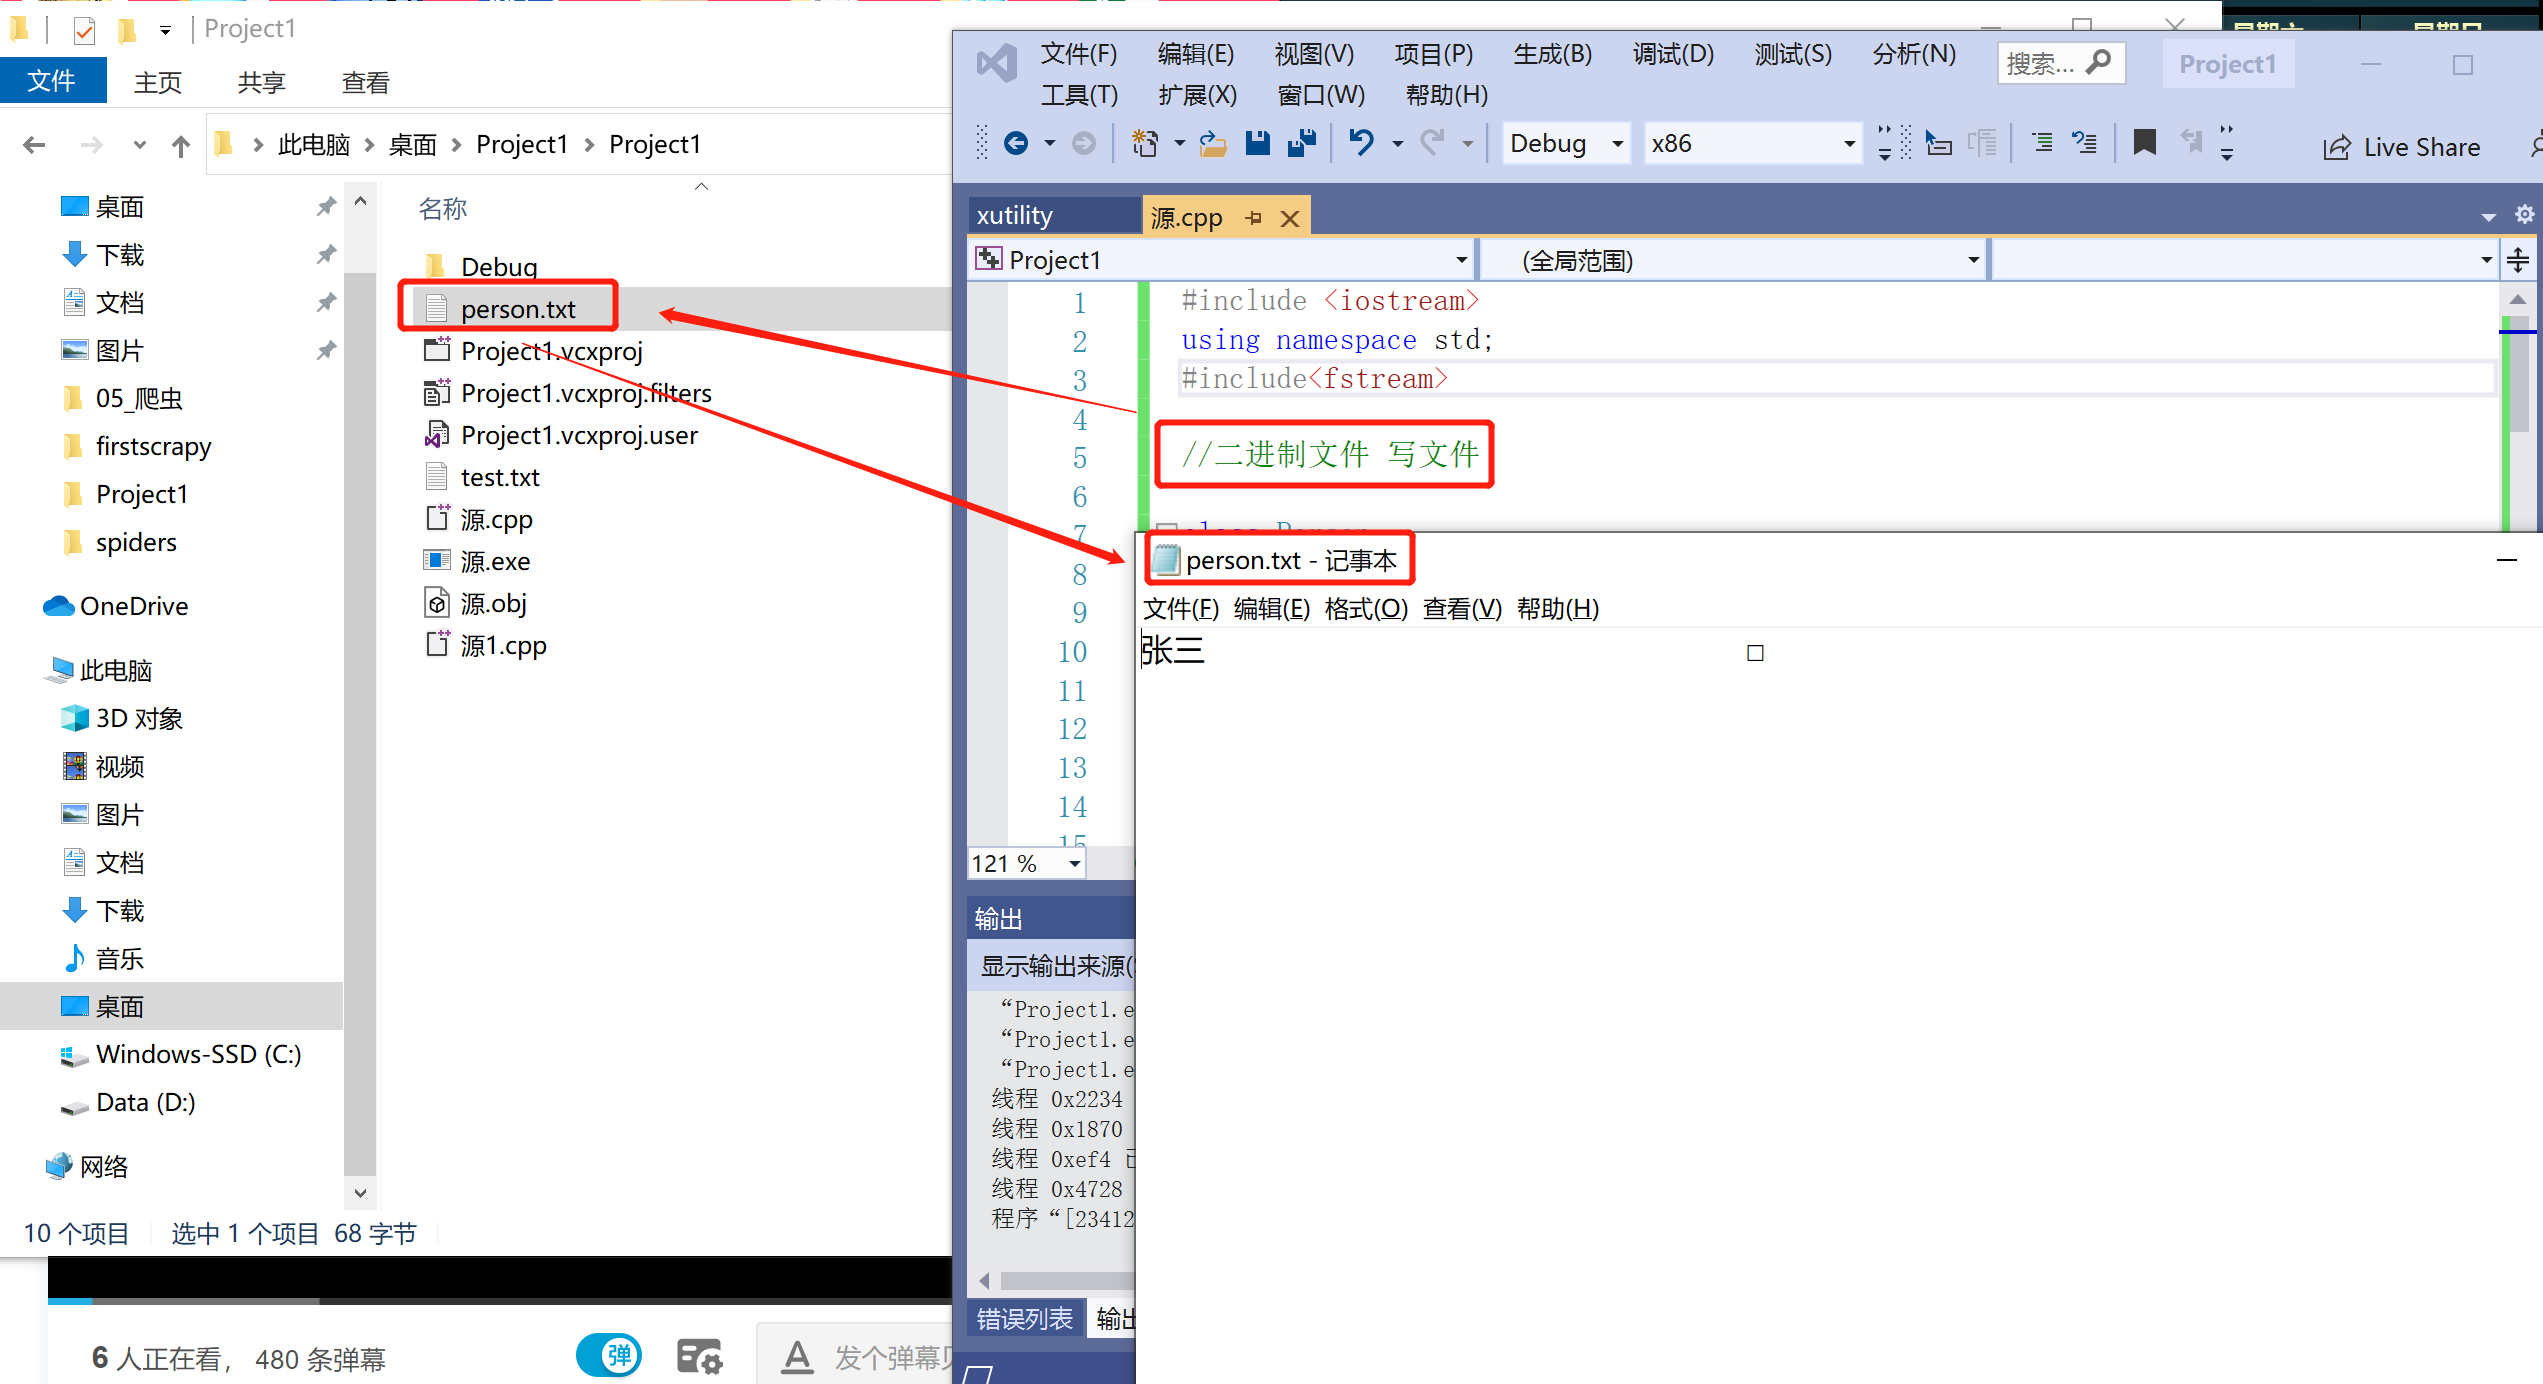

# 5. 二进制文件--读文件

① 二进制方式读文件主要利用流对象调用成员函数read。

② 函数原型：istream& read(char *buffer,int len);

③ 参数解释：字符串buffer指向内存中一段内存空间，len是读写的字节数。

In [ ]:
#include <iostream>
using namespace std;
#include<fstream>

//二进制文件 读文件

class Person
{
public:
    char m_Name[64];  //姓名  
    int m_Age;        //年龄
    //写字符串的时候最好不要用C++的string，有可能出现问题，最好用C的数组写字符串，因为它底层是用C写的
};

void test01()
{
    //1、包含头文件

    //2、创建流对象
    ifstream ifs;

    //3、打开文件
    ifs.open("person.txt", ios::in | ios::binary);  //二进制的方式读文件

    if (!ifs.is_open())
    {
        cout << "文件打开失败" << endl;
        return;
    }

    //4、写文件
    Person p;
    ifs.read((char*)&p, sizeof(Person));

    cout << "姓名：" << p.m_Name << " 年龄：" << p.m_Name << endl;

    //5、关闭文件
    ifs.close();
}

int main()
{
    test01();

    system("pause");

    return 0;
}

运行结果：  
 - 姓名：张三 年龄：张三  
 - 请按任意键继续. . .